In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd 
from datetime import datetime as dt
from datetime import date

from poll_weight import add_poll_weights, cleanup_data, combine_districts 
from utils import election_stats, state_results, \
                  plot_electoral_vote_distribution, \
                    plot_nelectoral_vs_popular_vote
from utils import std_weighted, filter_state_polls, convert_results_to_dict

from simulation import simulate_elections

In [2]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="pandas.core.arrays.datetimes")


In [3]:
results_2020 = pd.read_csv('./data/presidential_poll_averages_2020.csv')
results_2020 = convert_results_to_dict(results_2020)

In [4]:
# Read in polling data 
url = './data/president_polls.csv'
pad = pd.read_csv(url)

In [5]:
# Cleanup data 
pad = cleanup_data(pad, harris_filter=False)
ppl = pad.to_dict(orient = 'list')


C:\Users\Camer\Desktop\presidential_election-main\poll_weight.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'weight'] = df.apply(lambda row: poll_weight(


In [6]:
# states electoral votes
states_electoral = pd.read_csv('./data/states_electoral.csv')
states_abrv = np.array(states_electoral['State'])
states      = np.array(states_electoral['Name'])
electors    = np.array(states_electoral['Electors'])
nstates     = states.size
state_pop = np.array(states_electoral['Population'])

## Model 1 - Simplest Model

In [7]:
date_range = ['2024-09-01', '2024-10-12']
nsims = 100000
poll_type = 'pct'


simplest_model_results = simulate_elections(ppl, states=states, electors=electors, date_range=date_range, 
                                            poll_type=poll_type, min_weight = 0.00,results_2020=results_2020, nsims = nsims)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 1 poll only: Dem = [40.], Rep = [55.]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem = 39.36603, Rep =56.07426
Utah - 1 poll only: Dem = [39.], Rep = [54.]
Vermont - 2020 results: Dem = 55.73577, Rep =32.4644
Washington - 1 poll only: Dem = [53.], Re

In [8]:
model_name = 'model 1 (simplest model) - all polls'
election_stats(model_name, simplest_model_results)

===============Results of election simulations in the  model 1 (simplest model) - all polls ===
Harris wins in 68.1850 per cent of elections
        average and median Nelectoral = 276.76 and 276.00; in 95 percent range = [240.00  315.00]
Trump   wins in 31.8150 per cent of elections
        average and median Nelectoral = 258.24 and 259.00; in 95 percent range = [220.00  295.00]
 0.0000 per cent of elections end up in electoral college draw


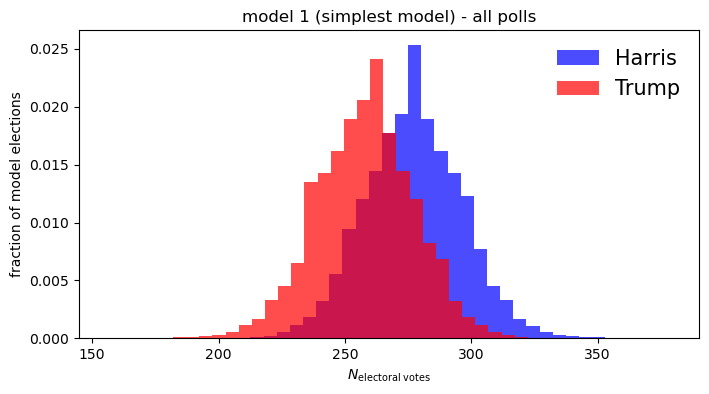

========== State-by-state vote predictions for model 1 (simplest model) - all polls ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.104           0.896
             Florida        0.019           0.981
             Georgia        0.378           0.622
                Iowa        0.200           0.800
            Michigan        0.494           0.505
      North Carolina        0.426           0.574
              Nevada        0.665           0.335
                Ohio        0.003           0.997
        Pennsylvania        0.797           0.203
               Texas        0.016           0.984
            Virginia        0.965           0.035
           Wisconsin        0.668           0.332


In [9]:
contested_states = ['Virginia', 'Nevada', 'Texas', 'Iowa', 'Michigan', 'Wisconsin', 
                    'Ohio', 'Georgia', 'Florida', 'North Carolina', 'Arizona', 'Pennsylvania']
plot_electoral_vote_distribution(model_name, simplest_model_results)
state_results(model_name, simplest_model_results, states, states_to_print=contested_states)

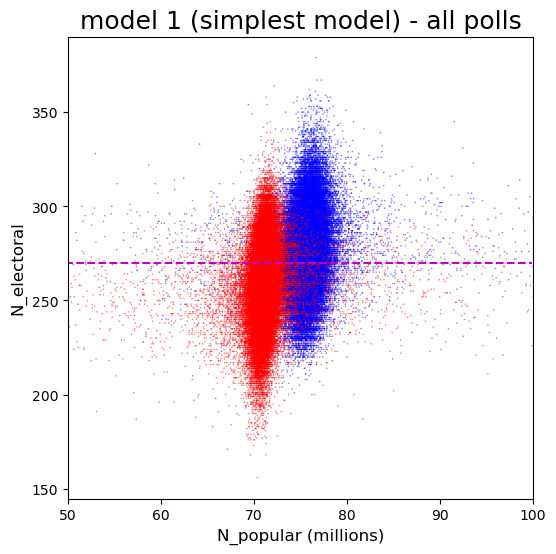

In [10]:
plot_nelectoral_vs_popular_vote(model_name, simplest_model_results, states, electors, state_pop)

## Model 2 - Historical Bias 

In [11]:
bias_df = pd.read_csv('./data/2020_results_polls.csv')

def get_bias(df):
    # Separate Democratic and Republican data
    dem_data = df[df['candidate_name'] == 'Joseph R. Biden Jr.'].set_index('state')
    rep_data = df[df['candidate_name'] == 'Donald Trump'].set_index('state')

    # Calculate biases and get electors for each state
    dem_bias = dem_data['bias']
    rep_bias = rep_data['bias']
    
    return np.array(dem_bias), np.array(rep_bias)

dem_bias, rep_bias = get_bias(bias_df)

## I should use the old biases computed from a line. take the line average. for a given bias in rep, give the bias in dem

In [12]:
#date_range = ['2024-01-01', '2024-10-06']
nsims = 10000
poll_type = 'pct'

kwargs = {'dem_bias': dem_bias, 'rep_bias': rep_bias}

model_results = simulate_elections(ppl, states, electors, date_range=date_range, poll_type=poll_type, 
                                            correlations = False, bias = True,
                                            min_weight = 0.00,results_2020=results_2020,nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 1 poll only: Dem = [40.], Rep = [55.]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem = 39.36603, Rep =56.07426
Utah - 1 poll only: Dem = [39.], Rep = [54.]
Vermont - 2020 results: Dem = 55.73577, Rep =32.4644
Washington - 1 poll only: Dem = [53.], Re

In [13]:
model_name = r'model 2 (hist bias for Trump and Biden polls)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 2 (hist bias for Trump and Biden polls) ===
Harris wins in 0.1200 per cent of elections
        average and median Nelectoral = 208.36 and 206.00; in 95 percent range = [179.00  248.00]
Trump   wins in 99.8800 per cent of elections
        average and median Nelectoral = 326.64 and 329.00; in 95 percent range = [287.00  356.00]
 0.0000 per cent of elections end up in electoral college draw


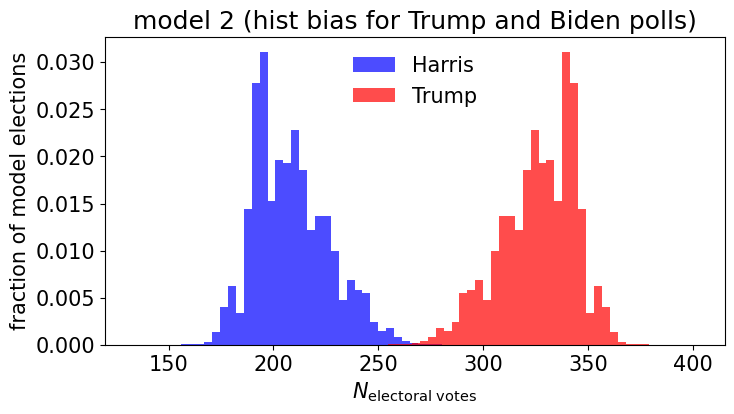

========== State-by-state vote predictions for model 2 (hist bias for Trump and Biden polls) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.001           0.999
             Florida        0.002           0.998
             Georgia        0.257           0.743
                Iowa        0.074           0.925
            Michigan        0.039           0.961
      North Carolina        0.000           1.000
              Nevada        0.221           0.779
                Ohio        0.000           1.000
        Pennsylvania        0.213           0.787
               Texas        0.001           1.000
            Virginia        0.879           0.120
           Wisconsin        0.000           1.000


In [14]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

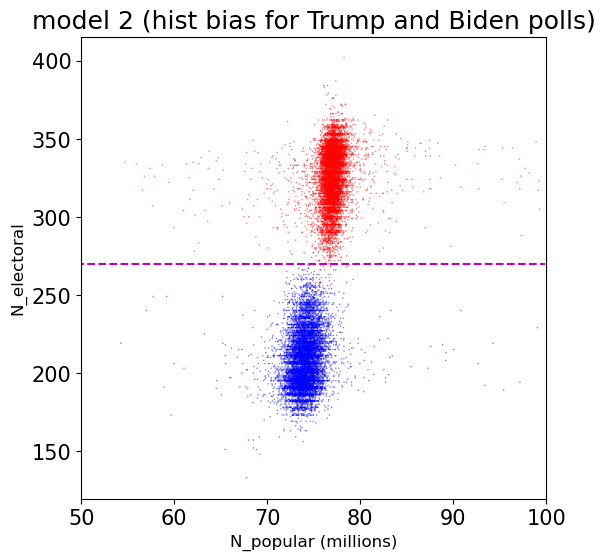

In [15]:
plot_nelectoral_vs_popular_vote(model_name, model_results, states, electors, state_pop)

## Model 3 - Historical Bias for Trump, negative bias for Harris

In [16]:
kwargs = {'dem_bias': -dem_bias, 'rep_bias': rep_bias}

model_results = simulate_elections(ppl, states, electors, date_range=date_range, poll_type=poll_type, 
                                    bias = True, min_weight = 0.00,results_2020=results_2020, nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 1 poll only: Dem = [40.], Rep = [55.]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem = 39.36603, Rep =56.07426
Utah - 1 poll only: Dem = [39.], Rep = [54.]
Vermont - 2020 results: Dem = 55.73577, Rep =32.4644
Washington - 1 poll only: Dem = [53.], Re

In [17]:
model_name = r'model 3 (hist bias for Trump polls, -bias for Harris polls)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 3 (hist bias for Trump polls, -bias for Harris polls) ===
Harris wins in 3.3700 per cent of elections
        average and median Nelectoral = 238.21 and 236.00; in 95 percent range = [212.00  270.00]
Trump   wins in 96.6300 per cent of elections
        average and median Nelectoral = 296.79 and 299.00; in 95 percent range = [265.00  323.00]
 0.0000 per cent of elections end up in electoral college draw


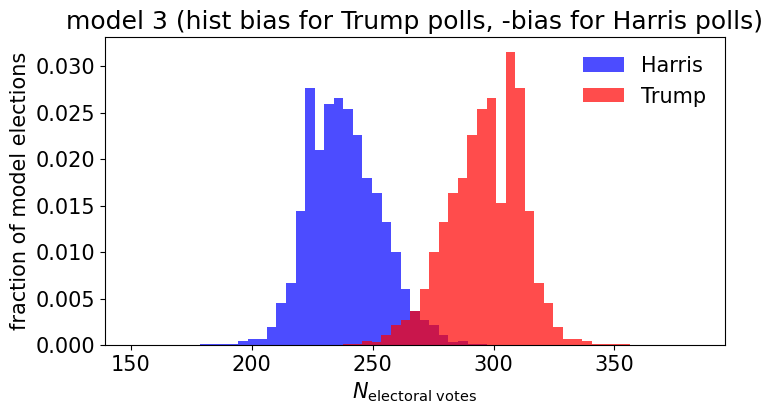

========== State-by-state vote predictions for model 3 (hist bias for Trump polls, -bias for Harris polls) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.017           0.983
             Florida        0.004           0.997
             Georgia        0.098           0.902
                Iowa        0.160           0.840
            Michigan        0.074           0.926
      North Carolina        0.062           0.938
              Nevada        0.301           0.699
                Ohio        0.000           1.000
        Pennsylvania        0.268           0.732
               Texas        0.003           0.997
            Virginia        0.909           0.091
           Wisconsin        0.257           0.744


In [18]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

## Model 4 - Historical Bias for Trump, no bias for Harris

In [19]:
kwargs = {'dem_bias': np.zeros_like(dem_bias), 'rep_bias': rep_bias}

model_results = simulate_elections(ppl, states, electors, date_range=date_range, poll_type=poll_type, 
                                    bias = True, min_weight = 0.00,results_2020=results_2020, nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 1 poll only: Dem = [40.], Rep = [55.]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem = 39.36603, Rep =56.07426
Utah - 1 poll only: Dem = [39.], Rep = [54.]
Vermont - 2020 results: Dem = 55.73577, Rep =32.4644
Washington - 1 poll only: Dem = [53.], Re

In [20]:
model_name = r'model 4 (hist bias for Trump polls, no for Harris polls)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 4 (hist bias for Trump polls, no for Harris polls) ===
Harris wins in 1.5000 per cent of elections
        average and median Nelectoral = 231.54 and 230.00; in 95 percent range = [196.00  265.00]
Trump   wins in 98.5000 per cent of elections
        average and median Nelectoral = 303.46 and 305.00; in 95 percent range = [270.00  339.00]
 0.0000 per cent of elections end up in electoral college draw


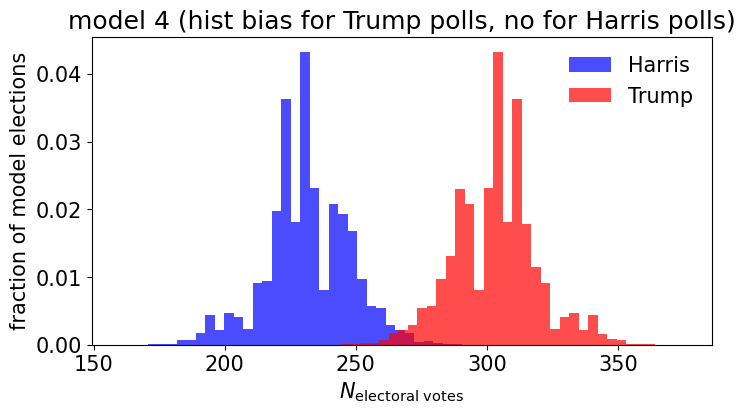

========== State-by-state vote predictions for model 4 (hist bias for Trump polls, no for Harris polls) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.004           0.996
             Florida        0.002           0.998
             Georgia        0.168           0.832
                Iowa        0.097           0.903
            Michigan        0.055           0.945
      North Carolina        0.001           0.999
              Nevada        0.263           0.737
                Ohio        0.000           1.000
        Pennsylvania        0.243           0.757
               Texas        0.001           0.999
            Virginia        0.894           0.106
           Wisconsin        0.017           0.983


In [21]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

## No bias for Harris, and ONLY 10% of historical bias for Trump

In [22]:
kwargs = {'dem_bias': np.zeros_like(dem_bias), 'rep_bias': 0.1*rep_bias}

model_results = simulate_elections(ppl, states, electors, date_range=date_range, poll_type=poll_type, 
                                    bias = True, min_weight = 0.00,results_2020=results_2020, nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 1 poll only: Dem = [40.], Rep = [55.]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem = 39.36603, Rep =56.07426
Utah - 1 poll only: Dem = [39.], Rep = [54.]
Vermont - 2020 results: Dem = 55.73577, Rep =32.4644
Washington - 1 poll only: Dem = [53.], Re

In [23]:
model_name = r'model 5 (10% of hist bias for Trump polls, no for Harris polls)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 5 (10% of hist bias for Trump polls, no for Harris polls) ===
Harris wins in 55.6600 per cent of elections
        average and median Nelectoral = 270.63 and 271.00; in 95 percent range = [234.00  309.00]
Trump   wins in 44.3400 per cent of elections
        average and median Nelectoral = 264.37 and 264.00; in 95 percent range = [226.00  301.00]
 0.0000 per cent of elections end up in electoral college draw


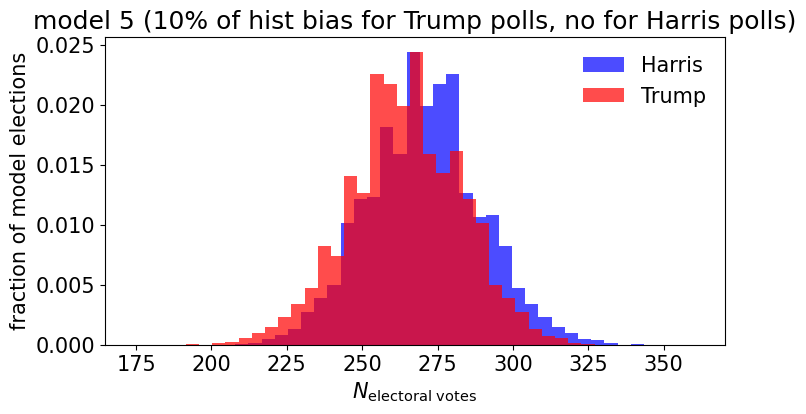

========== State-by-state vote predictions for model 5 (10% of hist bias for Trump polls, no for Harris polls) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.081           0.919
             Florida        0.015           0.985
             Georgia        0.364           0.636
                Iowa        0.184           0.816
            Michigan        0.428           0.572
      North Carolina        0.309           0.691
              Nevada        0.621           0.379
                Ohio        0.001           0.999
        Pennsylvania        0.753           0.247
               Texas        0.015           0.985
            Virginia        0.960           0.040
           Wisconsin        0.557           0.443


In [24]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

In [25]:
#### I should vary the bias for trump, and then plot how in general that changes. from Harris winning to Trump winning. 
# the key is that rep polls always underestimate how many they will get. 

## Models with Correlations

In [26]:
# Assuming you have 50 states
num_states = 51
years = [2008, 2012, 2016]

# Create an empty DataFrame
df = pd.DataFrame()

# Add state names (you'll need to replace this with actual state names)
df['State'] = [f'State_{i}' for i in range(1, num_states + 1)]

for year in years:
    # Add columns for each year
    df[f'Dem_results_{year}'] = np.random.uniform(0.3, 0.7, num_states)
    df[f'Rep_results_{year}'] = 1 - df[f'Dem_results_{year}']
    
    # Add poll columns (simulating polls as slightly off from results)
    df[f'Dem_polls_{year}'] = df[f'Dem_results_{year}'] + np.random.normal(0, 0.05, num_states)
    df[f'Rep_polls_{year}'] = df[f'Rep_results_{year}'] + np.random.normal(0, 0.05, num_states)

# Ensure poll numbers are between 0 and 1
for year in years:
    df[f'Dem_polls_{year}'] = df[f'Dem_polls_{year}'].clip(0, 1)
    df[f'Rep_polls_{year}'] = df[f'Rep_polls_{year}'].clip(0, 1)

# Save to CSV
df.to_csv('./data/presidential_polls_results_test.csv', index=False)


In [27]:
# import covariance matrix estimation routine with regularization
from sklearn.covariance import oas

def compute_state_covariance_matrix(states, 
                                    prev_election_results,
                                    years = [2004,2008, 2012, 2016,2020]):
    """
    compute bias vectors and covariance matrix using 2008 and 2012 election results 
    """
    
    nstates     = len(states)
    #prev_election_results = pd.read_csv(url)
    
    nyrs = len(years)

    # initialize auxiliary arrays
    dem_results = np.zeros(nstates); rep_results = np.zeros(nstates)
    dem_polls = np.zeros((nyrs,nstates)); rep_polls = np.zeros((nyrs,nstates))
    dem_res = np.zeros((nyrs,nstates)); rep_res = np.zeros((nyrs,nstates))
    
    for i, yr in enumerate(years):
        # the lines below show you how to read and extract poll and election results of 
        # 3 previous Presidential elections
        dem_res[i,:] = np.array(prev_election_results['DEM_results_'+str(yr)])
        rep_res[i,:] = np.array(prev_election_results['REP_results_'+str(yr)])
        dem_results += dem_res[i,:]
        rep_results += dem_res[i,:]
        
        dem_polls[i,:] = np.array(prev_election_results['DEM_polls_'+str(yr)])
        rep_polls[i,:] = np.array(prev_election_results['REP_polls_'+str(yr)])
        
    dem_results = np.mean(dem_res, axis=0)
    rep_results = np.mean(rep_res, axis=0)
    dem_polls_ave = np.mean(dem_polls, axis=0)
    rep_polls_ave = np.mean(rep_polls, axis=0)
    
    bias_dem = dem_results - dem_polls_ave
    bias_rep = rep_results - rep_polls_ave
    bdem_var = np.var(dem_res-dem_polls, ddof=1, axis=0)
    brep_var = np.var(rep_res-rep_polls, ddof=1, axis=0)
    
    # regularize empirical covariance matrix estimate
    cov_dem, shr_dem = oas(dem_res-dem_polls)
    cov_rep, shr_rep = oas(rep_res-rep_polls)
    corr_dem, corr_rep = np.zeros_like(cov_dem), np.zeros_like(cov_dem)
    for i in range(nstates):
        for j in range(nstates):
            corr_dem[i,j] = cov_dem[i,j] / np.sqrt(cov_dem[i,i] * cov_dem[j,j])
            corr_rep[i,j] = cov_rep[i,j] / np.sqrt(cov_rep[i,i] * cov_rep[j,j])
    
        
    return bias_dem, cov_dem, bdem_var, bias_rep, cov_rep, brep_var

In [28]:
def transform_election_data_for_covariance(df, years=[2004, 2008, 2012, 2016, 2020]):
    # Get unique states
    states = sorted(df['state'].unique())
    
    # Create a new dataframe with 'state' as index
    new_df = pd.DataFrame(index=states)
    
    for year in years:
        year_data = df[df['cycle'] == year]
        
        for party in ['DEM', 'REP']:
            party_data = year_data[year_data['party'] == party]
            
            # Add results column
            new_df[f'{party[:3]}_results_{year}'] = party_data.set_index('state')['result_pct'].reindex(states).fillna(0)
            
            # Add polls column
            new_df[f'{party[:3]}_polls_{year}'] = party_data.set_index('state')['poll_pct'].reindex(states).fillna(0)
    
    # Reset index to make 'state' a column
    new_df = new_df.reset_index().rename(columns={'index': 'state'})
    
    return new_df

In [29]:
results_polls_df = pd.read_csv('./data/processed/presidential_results_polls_statelevel.csv')
results_polls_df = transform_election_data_for_covariance(results_polls_df)
results_polls_df
dem_bias, cov_dem, bdem_var, rep_bias, cov_rep, brep_var = compute_state_covariance_matrix(states,results_polls_df)

# check that covariance matrices are positive-definite by trying their Cholesky decomposition 
ltest = np.linalg.cholesky(cov_dem)
ltest = np.linalg.cholesky(cov_rep)

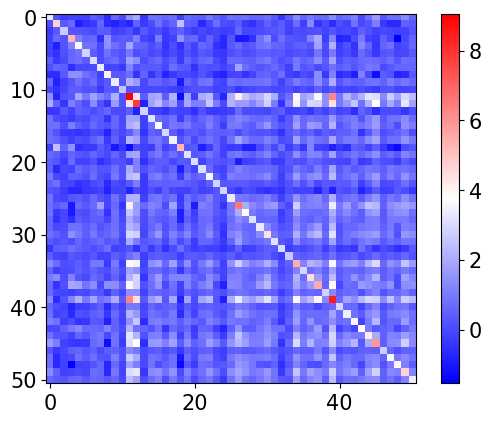

In [30]:
plt.imshow(cov_dem,cmap='bwr')
plt.colorbar()

In [43]:
nsims = 100000
poll_type = 'pct'
kwargs = {'cov_dem': cov_dem, 'cov_rep': cov_rep, 
          'dem_bias': np.zeros_like(dem_bias), 'rep_bias': np.zeros_like(rep_bias)}

model_results = simulate_elections(ppl, states=states, electors=electors, date_range=date_range, poll_type=poll_type, 
                                   correlations = True, bias = True, min_weight = 0.01, results_2020=results_2020,nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 2020 results: Dem = 44.99045, Rep =47.0019
Colorado - 1 poll only: Dem = [52.5], Rep = [42.42]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Delaware - 2020 results: Dem = 55.32496, Rep =40.35773
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
North Dakota - 1 poll only: Dem = [32.], Rep = [59.]
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem 

In [44]:
model_name = r'model 5 (including correlations, hist bias Harris and Trump)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 5 (including correlations, hist bias Harris and Trump) ===
Harris wins in 56.8390 per cent of elections
        average and median Nelectoral = 285.63 and 284.00; in 95 percent range = [105.00  471.00]
Trump   wins in 42.6970 per cent of elections
        average and median Nelectoral = 252.37 and 254.00; in 95 percent range = [67.00  433.00]
 0.4640 per cent of elections end up in electoral college draw


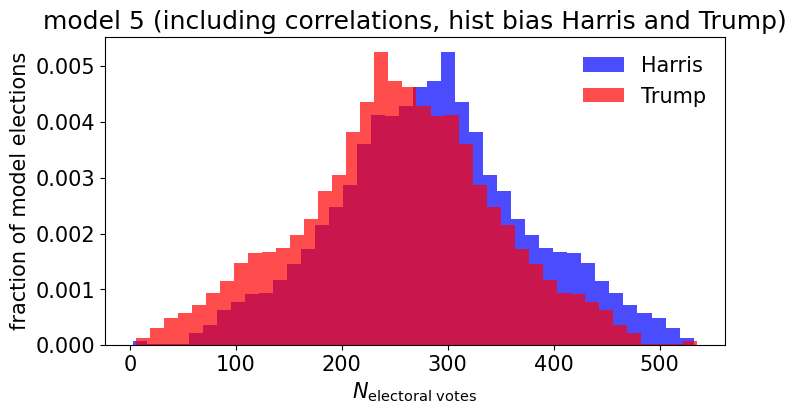

========== State-by-state vote predictions for model 5 (including correlations, hist bias Harris and Trump) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.259           0.741
             Florida        0.105           0.895
             Georgia        0.403           0.597
                Iowa        0.371           0.629
            Michigan        0.498           0.502
      North Carolina        0.484           0.516
              Nevada        0.577           0.423
                Ohio        0.257           0.743
        Pennsylvania        0.594           0.406
               Texas        0.251           0.749
            Virginia        0.708           0.292
           Wisconsin        0.529           0.471


In [45]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

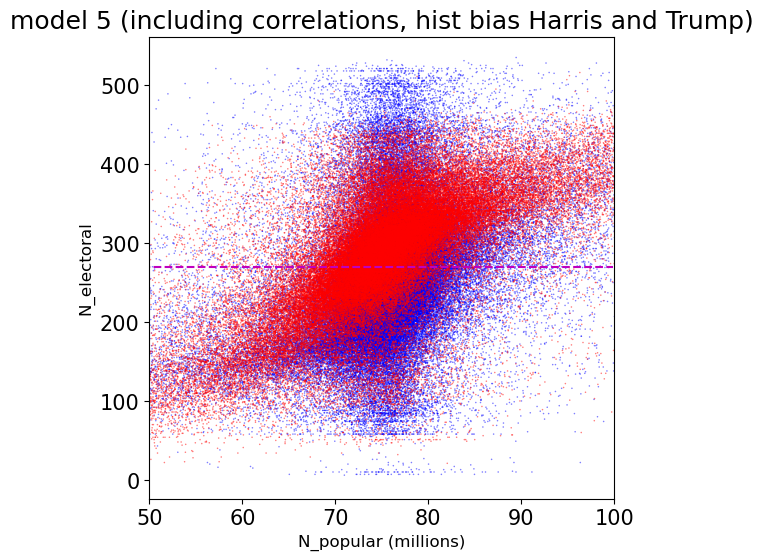

In [33]:
plot_nelectoral_vs_popular_vote(model_name, model_results, states, electors, state_pop)

## No bias for Harris, hist bias for trump, with correlation

In [36]:
nsims = 100000
poll_type = 'pct'
kwargs = {'cov_dem': cov_dem, 'cov_rep': cov_rep, 
          'dem_bias': dem_bias, 'rep_bias': rep_bias}

model_results = simulate_elections(ppl, states=states, electors=electors, date_range=date_range, poll_type=poll_type, 
                                   correlations = True, bias = True, min_weight = 0.01, results_2020=results_2020,nsims = nsims, **kwargs)

Alabama - 2020 results: Dem = 38.22156, Rep =59.14228
Arkansas - 2020 results: Dem = 44.99045, Rep =47.0019
Colorado - 1 poll only: Dem = [52.5], Rep = [42.42]
Connecticut - 1 poll only: Dem = [53.], Rep = [37.]
Delaware - 2020 results: Dem = 55.32496, Rep =40.35773
Hawaii - 2020 results: Dem = 56.38363, Rep =30.39808
Idaho - 2020 results: Dem = 34.61202, Rep =59.32396
Illinois - 1 poll only: Dem = [58.8], Rep = [41.2]
Kansas - 2020 results: Dem = 43.85426, Rep =52.15142
Kentucky - 2020 results: Dem = 39.13676, Rep =55.56443
Louisiana - 2020 results: Dem = 40.5963, Rep =52.53472
Mississippi - 2020 results: Dem = 41.74306, Rep =57.22134
North Dakota - 1 poll only: Dem = [32.], Rep = [59.]
New Jersey - 1 poll only: Dem = [56.], Rep = [44.]
Oklahoma - 2020 results: Dem = 34.57451, Rep =63.04416
Oregon - 2020 results: Dem = 50.90208, Rep =38.90223
South Carolina - 1 poll only: Dem = [42.], Rep = [51.6]
South Dakota - 2020 results: Dem = 37.78964, Rep =58.1232
Tennessee - 2020 results: Dem 

In [37]:
model_name = r'model 6 (including correlations, hist bias Harris and Trump)'
election_stats(model_name, model_results)

===============Results of election simulations in the  model 6 (including correlations, hist bias Harris and Trump) ===
Harris wins in 45.7020 per cent of elections
        average and median Nelectoral = 267.08 and 261.00; in 95 percent range = [101.00  459.00]
Trump   wins in 53.7970 per cent of elections
        average and median Nelectoral = 270.92 and 277.00; in 95 percent range = [79.00  437.00]
 0.5010 per cent of elections end up in electoral college draw


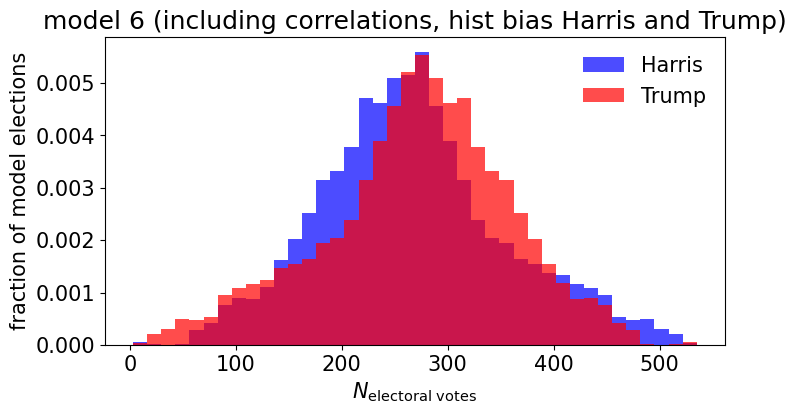

========== State-by-state vote predictions for model 6 (including correlations, hist bias Harris and Trump) ==========
               State   Haris win prob.  Trump win prob. 
             Arizona        0.089           0.911
             Florida        0.085           0.915
             Georgia        0.307           0.693
                Iowa        0.264           0.736
            Michigan        0.500           0.500
      North Carolina        0.305           0.695
              Nevada        0.420           0.580
                Ohio        0.195           0.805
        Pennsylvania        0.572           0.428
               Texas        0.250           0.750
            Virginia        0.758           0.242
           Wisconsin        0.314           0.686


In [38]:
plot_electoral_vote_distribution(model_name, model_results)
state_results(model_name, model_results, states, states_to_print=contested_states)

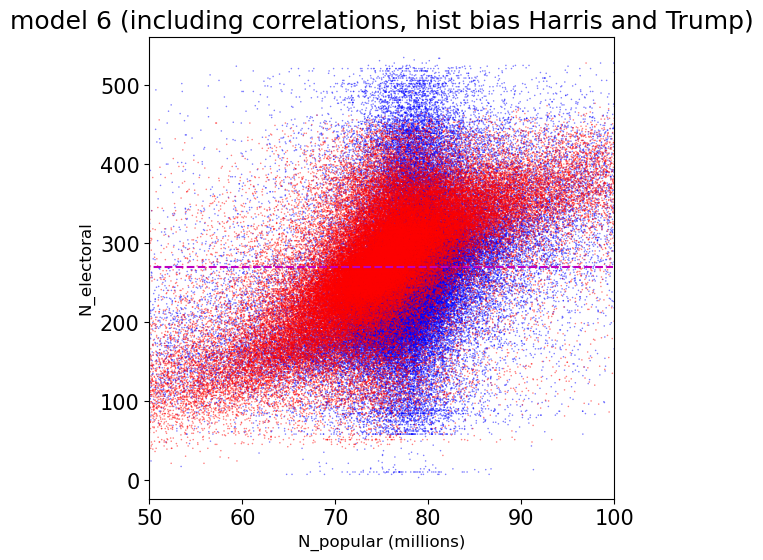

In [39]:
plot_nelectoral_vs_popular_vote(model_name, model_results, states, electors, state_pop)

### The election is very close, especially taken correlation into account. The (slight) edge on each side all depends on whether one includes the bias from either side. 